In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [10]:
mouse_df = pd.read_csv('mouse_metadata.csv')
study_df=pd.read_csv('study_results.csv')
study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [11]:
df=pd.merge(study_df, mouse_df, on=["Mouse ID","Mouse ID"], how='left')

In [12]:
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
df["Mouse ID"].value_counts()
clinical_df=df.fillna(0)

In [14]:
clinical_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
drug_regimen_group=clinical_df.groupby("Drug Regimen")
drug_mean=drug_regimen_group["Tumor Volume (mm3)"].mean()
drug_median=drug_regimen_group["Tumor Volume (mm3)"].median()
drug_var=drug_regimen_group["Tumor Volume (mm3)"].var()
drug_std=drug_regimen_group["Tumor Volume (mm3)"].std()
drug_sem=drug_regimen_group["Tumor Volume (mm3)"].sem()


drug_summary_stats_df = pd.DataFrame({
    "Mean":drug_mean,
    "Median":drug_median,
    "Variance":drug_var,
    "Standard Deviation":drug_std,
    "Standard Error of Mean":drug_sem,
})

drug_summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
total_drugs=drug_regimen_group['Mouse ID'].count()
drug_regimen_group.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


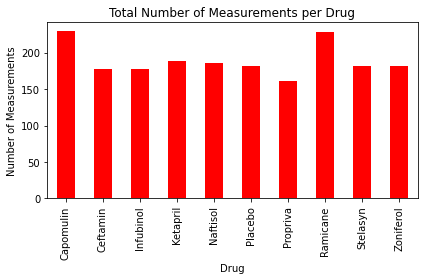

In [51]:
total_drugs.plot(kind="bar", facecolor="red")
plt.title("Total Number of Measurements per Drug")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug")
plt.tight_layout()

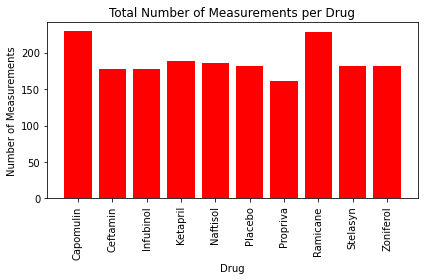

In [91]:
drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
# tick_locations = [value+0.4 for value in drugs]

plt.bar(drugs,total_drugs,color='r',align="center")

plt.title("Total Number of Measurements per Drug")
plt.xticks(rotation="vertical")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug")
plt.tight_layout()

Text(0.5, 1.0, 'Gender Distribution')

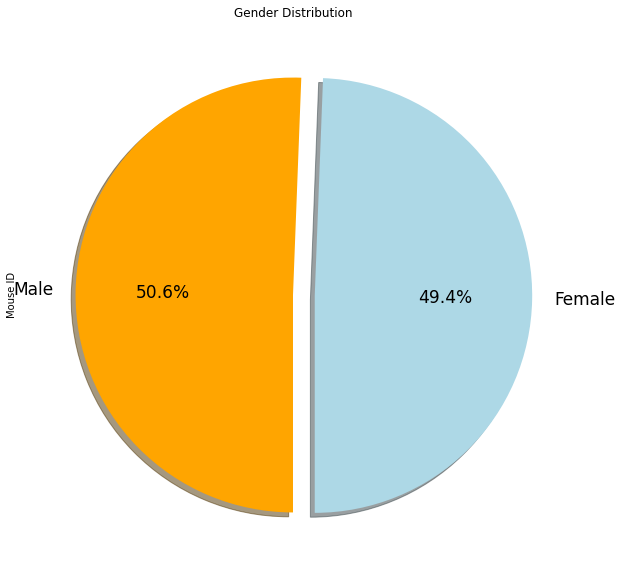

In [125]:
drug_sex_group=clinical_df.groupby("Sex")
total_sex=drug_sex_group['Mouse ID'].count()
explode = (0.1, 0)
colors=["lightblue","orange"]
gender_pie=total_sex.plot(kind="pie",figsize=(20,10),colors=colors,autopct='%1.1f%%',startangle=270, fontsize=17,shadow=True, explode=explode)

plt.title("Gender Distribution")



Text(0.5, 1.0, 'Gender Distribution')

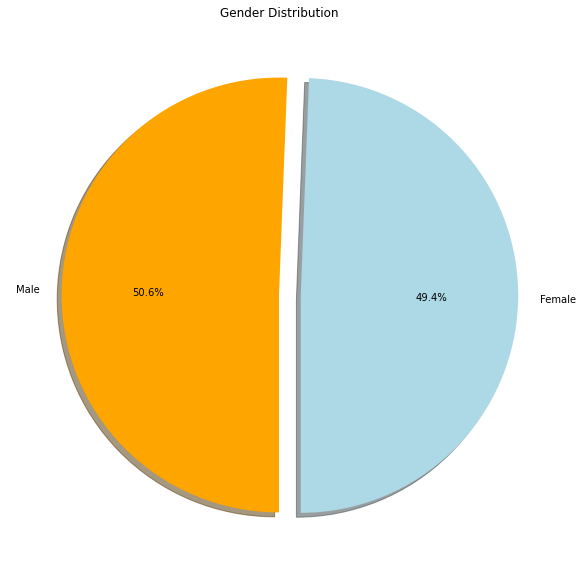

In [124]:
labels_pie=["Female","Male"]
colors_pie=["lightblue","orange"]
fig = plt.figure(figsize=(10,10))
explode = (0.1, 0,)
plt.pie(total_sex, explode=explode,labels=labels_pie,colors=colors_pie,shadow=True,startangle=270,autopct='%1.1f%%')

plt.title("Gender Distribution")

In [212]:
capo_df=clinical_df.loc[clinical_df["Drug Regimen"]=="Capomulin"]
ram_df=clinical_df.loc[clinical_df["Drug Regimen"]=="Ramicane"]
infu_df=clinical_df.loc[clinical_df["Drug Regimen"]=="Infubinol"]
ceft_df=clinical_df.loc[clinical_df["Drug Regimen"]=="Ceftamin"]


# greatest_ceft=ceft_df.groupby("Mouse ID").max()["Timepoint"]
# greatest_ceft

# greatest_capo=capo_df.groupby("Mouse ID").max()["Timepoint"]
# greatest_capo

# greatest_ram=ram_df.groupby("Mouse ID").max()["Timepoint"]
# greatest_ram

# greatest_infu=infu_df.groupby("Mouse ID").max()["Timepoint"]
# greatest_infu

In [213]:
merged_capo=pd.merge(greatest_capo,clinical_df, on=("Mouse ID","Timepoint"), how="left")
merged_capo

quartiles_capo = merged_capo["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_capo = quartiles_capo[0.25]
upperq_capo = quartiles_capo[0.75]
iqr_capo = upperq_capo-lowerq_capo
lower_bound_capo = lowerq_capo - (1.5*iqr_capo)
upper_bound_capo = upperq_capo + (1.5*iqr_capo)

print(f"The lower quartile of Capomulin tests is: {lowerq_capo}")
print(f"The upper quartile of Capomulin tests is: {upperq_capo}")
print(f"The interquartile range of Capomulin is: {iqr_capo}")
print(f"Values below {lower_bound_capo} could be outliers.")
print(f"Values above {upper_bound_capo} could be outliers.")

merged_capo

The lower quartile of Capomulin tests is: 32.37735684
The upper quartile of Capomulin tests is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [192]:
merged_ceft=pd.merge(greatest_ceft,clinical_df, on=("Mouse ID","Timepoint"), how="left")
merged_ceft

quartiles_ceft = merged_ceft["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)

print(f"The lower quartile of Ceftamin tests is: {lowerq_ceft}")
print(f"The upper quartile of Ceftamin tests is: {upperq_ceft}")
print(f"The interquartile range of Ceftamin is: {iqr_ceft}")
print(f"Values below {lower_bound_ceft} could be outliers.")
print(f"Values above {upper_bound_ceft} could be outliers.")


The lower quartile of Ceftamin tests is: 48.72207785
The upper quartile of Ceftamin tests is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


The lower quartile of Infubinol tests is: 54.04860769
The upper quartile of Infubinol tests is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


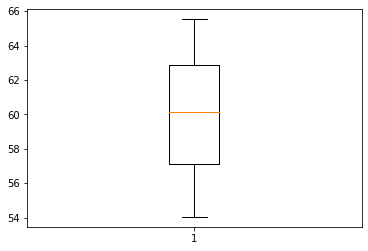

In [206]:
merged_infu=pd.merge(greatest_infu,clinical_df, on=("Mouse ID","Timepoint"), how="left")
merged_infu


quartiles_infu = merged_infu["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_infu = quartiles_infu[0.25]
upperq_infu = quartiles_infu[0.75]
iqr_infu = upperq_infu-lowerq_infu
lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)

print(f"The lower quartile of Infubinol tests is: {lowerq_infu}")
print(f"The upper quartile of Infubinol tests is: {upperq_infu}")
print(f"The interquartile range of Infubinol is: {iqr_infu}")
print(f"Values below {lower_bound_infu} could be outliers.")
print(f"Values above {upper_bound_infu} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.boxplot(quartiles_infu, showfliers=True)
plt.show()

In [190]:
merged_ram=pd.merge(greatest_ram,clinical_df, on=("Mouse ID","Timepoint"), how="left")
merged_ram

quartiles_ram = merged_ram["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram= quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

print(f"The lower quartile of Ramicane tests is: {lowerq_ram}")
print(f"The upper quartile of Ramicane tests is: {upperq_ram}")
print(f"The interquartile range of Ramicane is: {iqr_ram}")
print(f"Values below {lower_bound_ram} could be outliers.")

print(f"Values above {upper_bound_ram} could be outliers.")


The lower quartile of Ramicane tests is: 31.56046955
The upper quartile of Ramicane tests is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


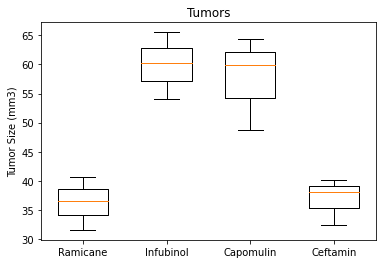

Text(0.5, 3.1999999999999993, 'Drug')

<Figure size 720x720 with 0 Axes>

In [211]:
data=[quartiles_ram,quartiles_infu,quartiles_ceft,quartiles_capo]


red_diamond=dict(markerfacecolor='r',marker='D')

fig1, ax1=plt.subplots()
ax1.set_title('Tumors')
ax1.boxplot(data,flierprops=red_diamond,labels=["Ramicane","Infubinol","Capomulin","Ceftamin",],widths=.60,showfliers=True)
ax1.set_ylabel('Tumor Size (mm3)')
plt.show()
plt.figure(figsize=(10,10))
ax1.set_xlabel("Drug")


In [238]:
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


Text(0, 0.5, 'Tumor Volume (mm3)')

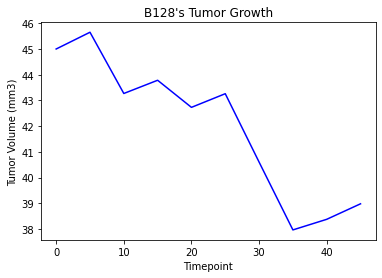

In [237]:
mouse_df=clinical_df.loc[clinical_df["Mouse ID"]=="b128"]
mouse_df
Tumor_Volume =mouse_df["Tumor Volume (mm3)"]
Timepoint=mouse_df["Timepoint"]
plt.plot(Timepoint,Tumor_Volume,color="blue",label="Tumor Volume over Time")

plt.title("B128's Tumor Growth")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


In [262]:
%matplotlib notebook

<IPython.core.display.Javascript object>


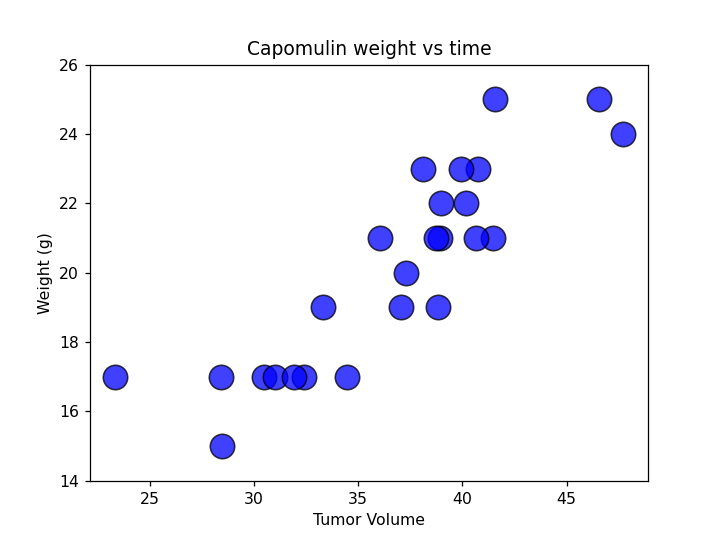

The correlation between both factors is 0.88


In [272]:
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

capo_weight=merged_capo["Weight (g)"]
capo_tumor=merged_capo["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_tumor, capo_weight)

regress_values = capo_tumor * slope + capo_weight
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capo_tumor,capo_weight,marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(capo_tumor,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(14,26)
plt.title("Capomulin weight vs time")
plt.xlabel("Tumor Volume")
plt.ylabel("Weight (g)")

correlation = sts.pearsonr(capo_tumor,capo_weight)


plt.show()

print(f"The correlation between both factors is {round(correlation[0],2)}")



In [267]:

from scipy.stats import linregress
import numpy as np
from sklearn import datasets
# Calculate the correlation coefficient and linear regression model between mouse weight 
# and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

